In [1]:
# In this Kernel we will be looking at the Titanic Classification dataset from Kaggle. The purpose of the dataset
# is to attempt to correctly classify whether or not passengers will survive using passenger data.

In [2]:
# importing libraries and data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# importing data
titanic = pd.read_csv('train.csv')

In [5]:
# Time to Look at general features of the dataset

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


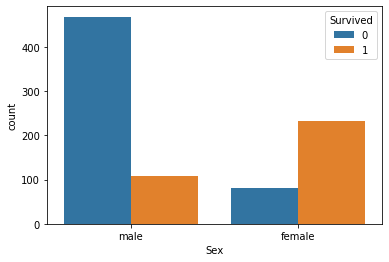

In [9]:
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])

C:\Users\myate\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


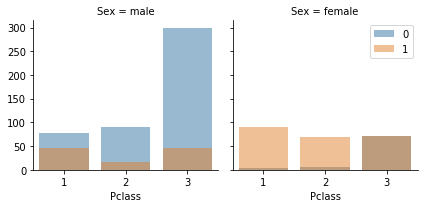

In [10]:
g = sns.FacetGrid(titanic, col = 'Sex', hue = 'Survived')
g.map(sns.countplot,'Pclass',alpha=.5)
plt.legend()

In [11]:
titanic['Male'] = pd.get_dummies(titanic['Sex'],drop_first=True)

In [12]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

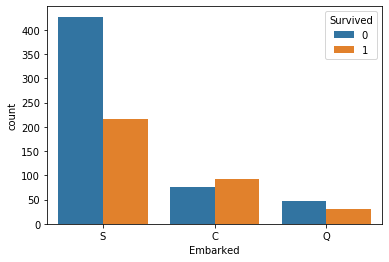

In [13]:
sns.countplot(x=titanic['Embarked'], hue = titanic['Survived'])

In [14]:
titanic[['q_embarked','s_embarked']] = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [15]:
# Time to visualize how much of our data is missing. We can already see that age and cabin have large
# amounts of missing data from the .info() call.

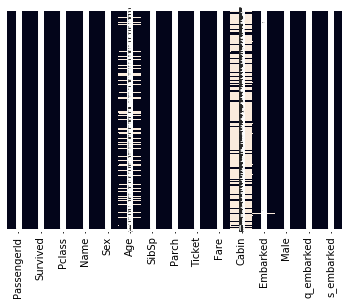

In [16]:
null_values = titanic.isnull()
sns.heatmap(null_values,annot=True, yticklabels=False, cbar = False)

In [17]:
# So, using the info from the info pane and the heatmap (would be more useful for visualizing a larger amount of x variables)
# We can see that age is missing around 20% of the values, whereas cabin is virtually non-existent. So let's true to find a 
# way to estimate values for age

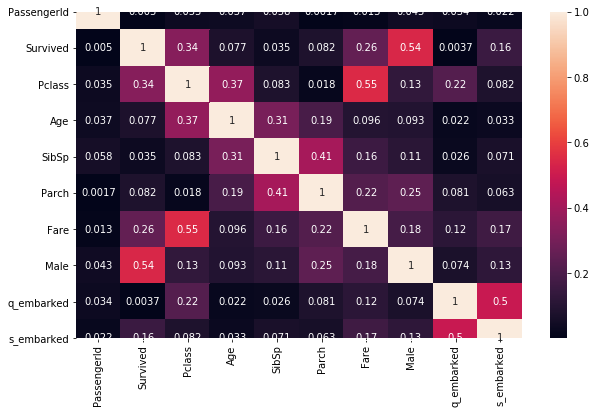

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(abs(titanic.corr()), annot = True)

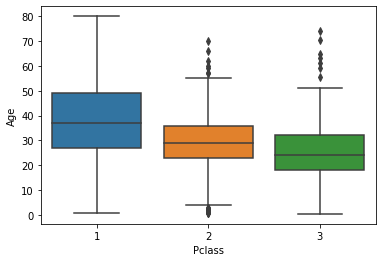

In [19]:
sns.boxplot(x='Pclass', y = 'Age', data = titanic)

In [20]:
titanic[titanic['Pclass']==1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
for x in range(1,4):    
    print('Median for Pclass', x, 'is :', (titanic[titanic['Pclass']==x]['Age'].mean()))

Median for Pclass 1 is : 38.233440860215055
Median for Pclass 2 is : 29.87763005780347
Median for Pclass 3 is : 25.14061971830986


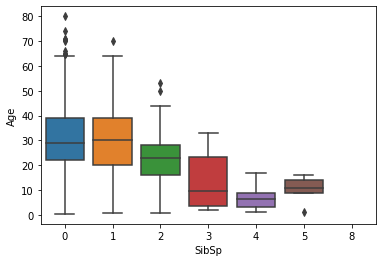

In [22]:
sns.boxplot(x='SibSp', y = 'Age', data = titanic)

In [23]:
#Create function to replace null values of age with median age

def guess_age(passenger):
    age = passenger[0]
    classe = passenger[1]
    
    if pd.isnull(age):
        if classe == 1:
            return 37
        elif classe == 2:
            return 29
        else:
            return 24
    else:
        return age

In [24]:
titanic['Age'] = titanic[['Age','Pclass']].apply(guess_age,axis=1)

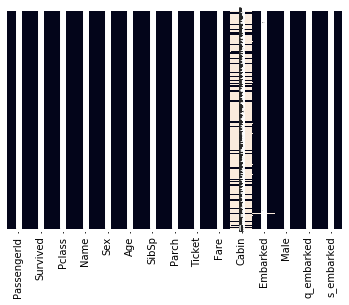

In [25]:
null_values = titanic.isnull()
sns.heatmap(null_values,annot=True, yticklabels=False, cbar = False)

In [26]:
#Drop out cabin, too little data to actually try to predict
titanic.drop('Cabin', axis = 1, inplace=True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,q_embarked,s_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
X = titanic.drop(['Survived','Embarked','PassengerId','Sex','Ticket','Name'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
RFC = RandomForestClassifier()

In [31]:
RFC.fit(X_train,y_train)
rforest_pred = RFC.predict(X_test)

C:\Users\myate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LogReg = LogisticRegression()

In [34]:
LogReg.fit(X_test,y_test)
logreg_pred = LogReg.predict(X_test)

C:\Users\myate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_test,rforest_pred))
print()
print(classification_report(y_test,rforest_pred))

[[131  26]
 [ 33  78]]

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [37]:
print(confusion_matrix(y_test,logreg_pred))
print()
print(classification_report(y_test,logreg_pred))

[[139  18]
 [ 34  77]]

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

